#Import Library

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Import Data

In [83]:
df_customer = pd.read_csv('/content/Case Study - Customer.csv', delimiter=';')
df_product = pd.read_csv('/content/Case Study - Product.csv', delimiter=';')
df_store = pd.read_csv('/content/Case Study - Store.csv', delimiter=';')
df_transaction = pd.read_csv('/content/Case Study - Transaction.csv', delimiter=';')

#Data Preprocessing

##Data Customer

In [84]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [85]:
print('Daftar tipe data:\n' + str(df_customer.dtypes))

Daftar tipe data:
CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object


In [86]:
df_customer['Income'] = df_customer['Income'].replace(',', '.', regex=True)
df_customer['Income'] = df_customer['Income'].astype(float)
print('Daftar tipe data:\n' + str(df_customer.dtypes))

Daftar tipe data:
CustomerID          int64
Age                 int64
Gender              int64
Marital Status     object
Income            float64
dtype: object


In [87]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [88]:
df_customer.describe()

,CustomerID,Age,Gender,Income
count,447.000000,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613,8.592103
std,129.182042,12.848719,0.498842,6.607065
min,1.000000,0.000000,0.000000,0.000000
25%,112.500000,30.000000,0.000000,4.175000
50%,224.000000,39.000000,0.000000,7.520000
75%,335.500000,50.500000,1.000000,10.810000
max,447.000000,72.000000,1.000000,71.300000


In [89]:
df_customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [90]:
df_customer.dropna(inplace=True)
df_customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [91]:
df_customer.duplicated().sum()

0

##Data Transaction

In [92]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [93]:
print('Daftar tipe data:\n' + str(df_transaction.dtypes))

Daftar tipe data:
TransactionID    object
CustomerID        int64
Date             object
ProductID        object
Price             int64
Qty               int64
TotalAmount       int64
StoreID           int64
dtype: object


In [94]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])
print('Daftar tipe data:\n' + str(df_transaction.dtypes))

Daftar tipe data:
TransactionID            object
CustomerID                int64
Date             datetime64[ns]
ProductID                object
Price                     int64
Qty                       int64
TotalAmount               int64
StoreID                   int64
dtype: object


<ipython-input-94-2a6ce54d227b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])


In [95]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [96]:
df_transaction.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [97]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [98]:
df_transaction.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [99]:
df_transaction.duplicated().sum()

0

##Data Product

In [100]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [101]:
print('Daftar tipe data:\n' + str(df_product.dtypes))

Daftar tipe data:
ProductID       object
Product Name    object
Price            int64
dtype: object


In [102]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [103]:
df_product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [104]:
df_product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [105]:
df_product.duplicated().sum()

0

##Data Store

In [106]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [107]:
print('Daftar tipe data:\n' + str(df_store.dtypes))

Daftar tipe data:
StoreID        int64
StoreName     object
GroupStore    object
Type          object
Latitude      object
Longitude     object
dtype: object


In [108]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [109]:
df_store[['Latitude','Longitude']] = df_store[['Latitude','Longitude']].replace(',', '.', regex=True)
df_store[['Latitude','Longitude']] = df_store[['Latitude','Longitude']].astype(float)
print('Daftar tipe data:\n' + str(df_store.dtypes))

Daftar tipe data:
StoreID         int64
StoreName      object
GroupStore     object
Type           object
Latitude      float64
Longitude     float64
dtype: object


In [110]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [111]:
df_store.describe()

,StoreID,Latitude,Longitude
count,14.0000,14.000000,14.000000
mean,7.5000,-2.902409,109.463117
std,4.1833,4.516744,8.654790
min,1.0000,-7.797068,95.323753
25%,4.2500,-6.736148,104.884083
50%,7.5000,-4.395051,108.989384
75%,10.7500,0.082839,114.134794
max,14.0000,5.548290,128.190643


In [112]:
df_store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [113]:
df_store.duplicated().sum()

0

##Merge Dataset

In [114]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17
3,4,31,1,Married,4.87
4,5,58,1,Married,3.57


In [115]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [116]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [117]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,5,Bonafid,Gita,General Trade,-7.250445,112.768845


In [118]:
df_merge = df_transaction.merge(df_customer, on='CustomerID')

In [119]:
df_merge = df_merge.merge(df_product.drop(columns='Price'), on='ProductID')

In [120]:
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers
1,TR20170,165,2022-07-23,P3,7500,2,15000,13,44,1,Married,14.58,Crackers
2,TR80016,183,2022-01-24,P3,7500,2,15000,10,27,1,Single,0.18,Crackers
3,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers
4,TR82094,183,2022-09-15,P3,7500,2,15000,1,27,1,Single,0.18,Crackers
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,TR56886,317,2022-12-13,P4,12000,1,12000,11,55,0,Married,13.89,Potato Chip
4972,TR19361,348,2022-05-29,P4,12000,3,36000,7,29,1,Married,4.64,Potato Chip
4973,TR35558,192,2022-12-09,P4,12000,2,24000,10,26,0,Single,4.47,Potato Chip
4974,TR27321,441,2022-11-08,P4,12000,2,24000,10,19,0,Single,2.66,Potato Chip


In [121]:
df_merge = df_merge.merge(df_store, on='StoreID')

In [122]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


#Modeling

##Regresi with ARIMA

###Merge Dataframe

In [123]:
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4971,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4972,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4973,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4974,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [124]:
df_regresi = df_merge.groupby(['Date']).agg({'Qty':'sum'}).reset_index()
df_regresi = df_regresi.set_index('Date')

###Cek Seasonal Decompose

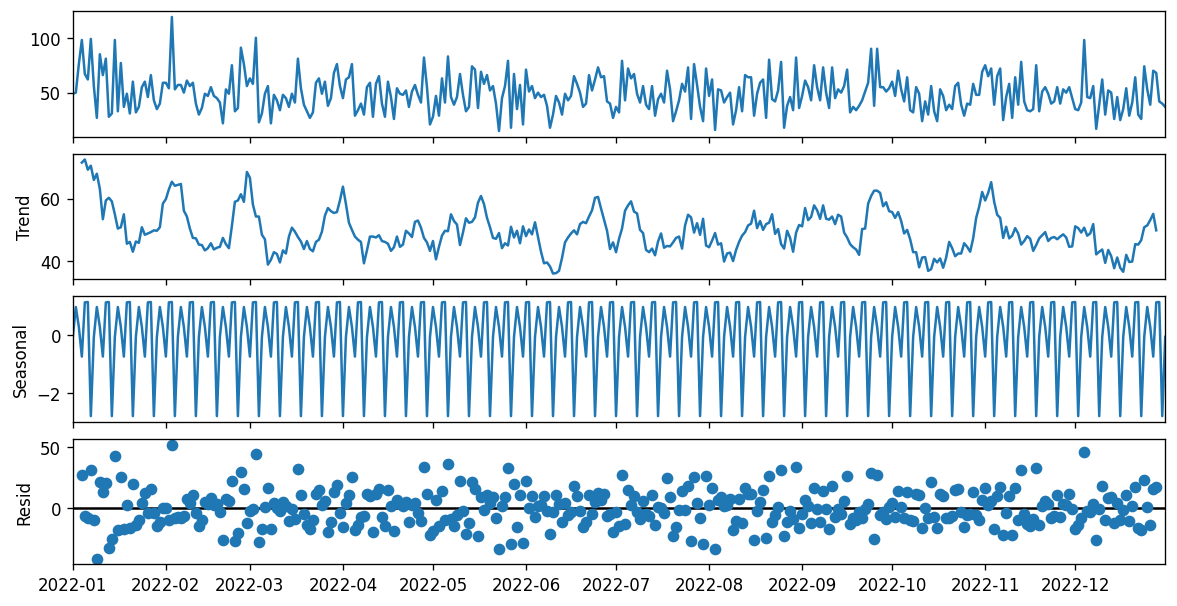

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_regresi)

decomp.plot()
plt.gcf().set_size_inches(10, 5)
plt.show()

Text(0.5, 1.0, 'Resid')

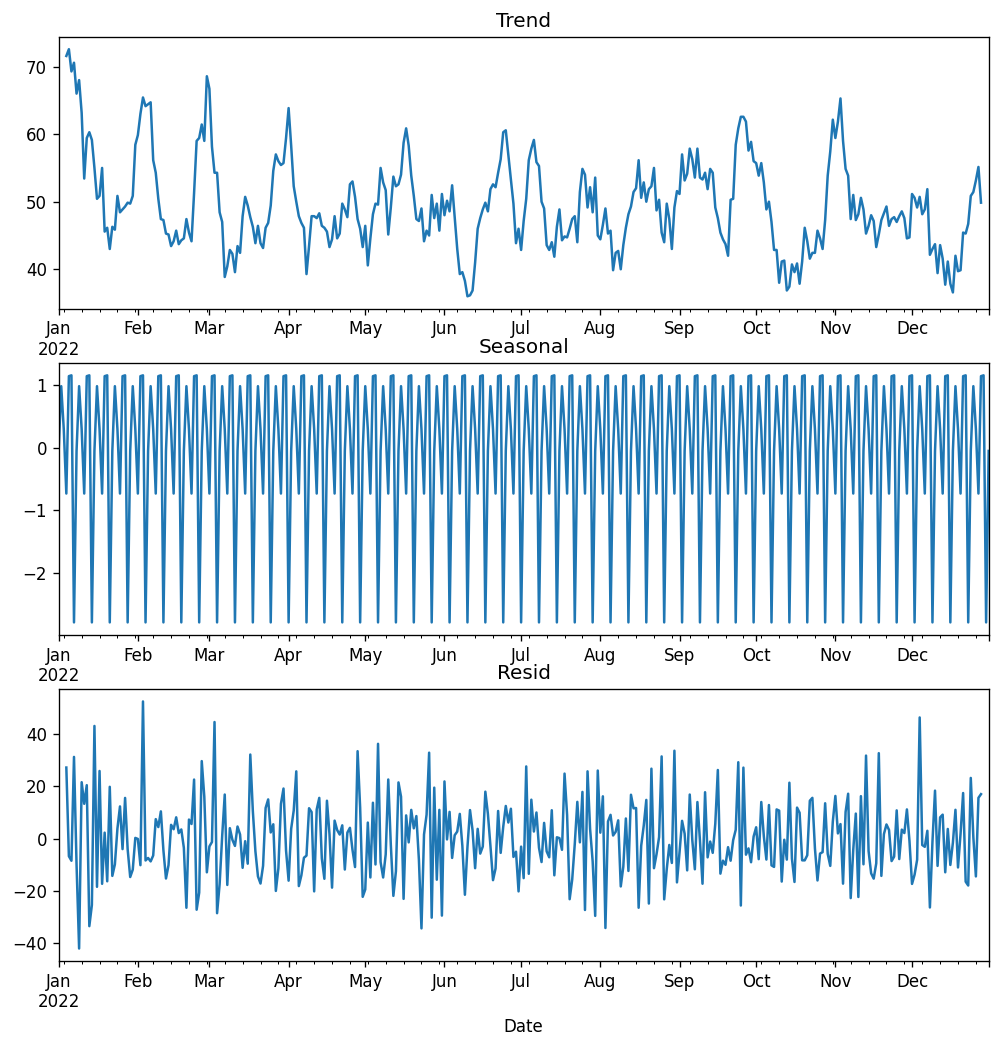

In [126]:
plt.figure(figsize=(10,10))
plt.subplot(311)
decomp.trend.plot()
plt.title('Trend')
plt.subplot(312)
decomp.seasonal.plot()
plt.title('Seasonal')
plt.subplot(313)
decomp.resid.plot()
plt.title('Resid')

dapat dilihat dari grafik-grafik diatas, data yang dimiliki meurpakan data seasonal

###Cek Stasioner

In [127]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_regresi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.091514
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


Merupakan data stasioner karena p-value kurang dari alpha atau 0.005

###Memecah jadi data latih dan data uji

In [128]:
cutOff = round(df_regresi.shape[0]*0.8)
df_train = df_regresi[:cutOff]
df_test = df_regresi[cutOff:]
df_train.shape, df_test.shape

((292, 1), (73, 1))

In [129]:
df_train

,Qty
Date,
2022-01-01,49
2022-01-02,50
2022-01-03,76
2022-01-04,98
2022-01-05,67
...,...
2022-10-15,33
2022-10-16,24
2022-10-17,53


In [130]:
df_test

,Qty
Date,
2022-10-20,39
2022-10-21,35
2022-10-22,56
2022-10-23,59
2022-10-24,39
...,...
2022-12-27,70
2022-12-28,68
2022-12-29,42


###Mencari nilai p,d,dan q

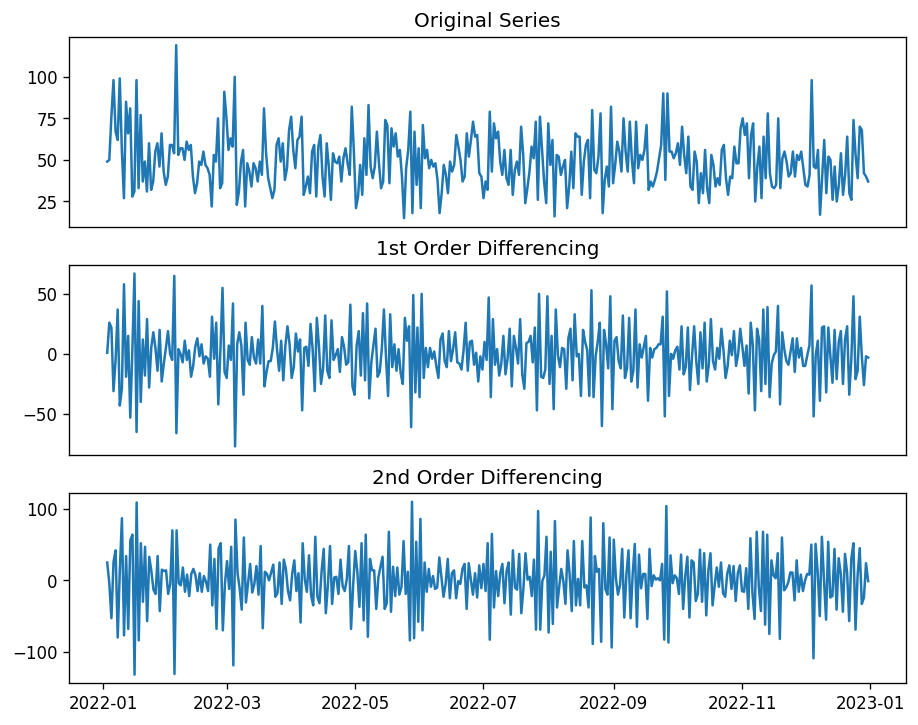

In [131]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df_regresi); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df_regresi.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df_regresi.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

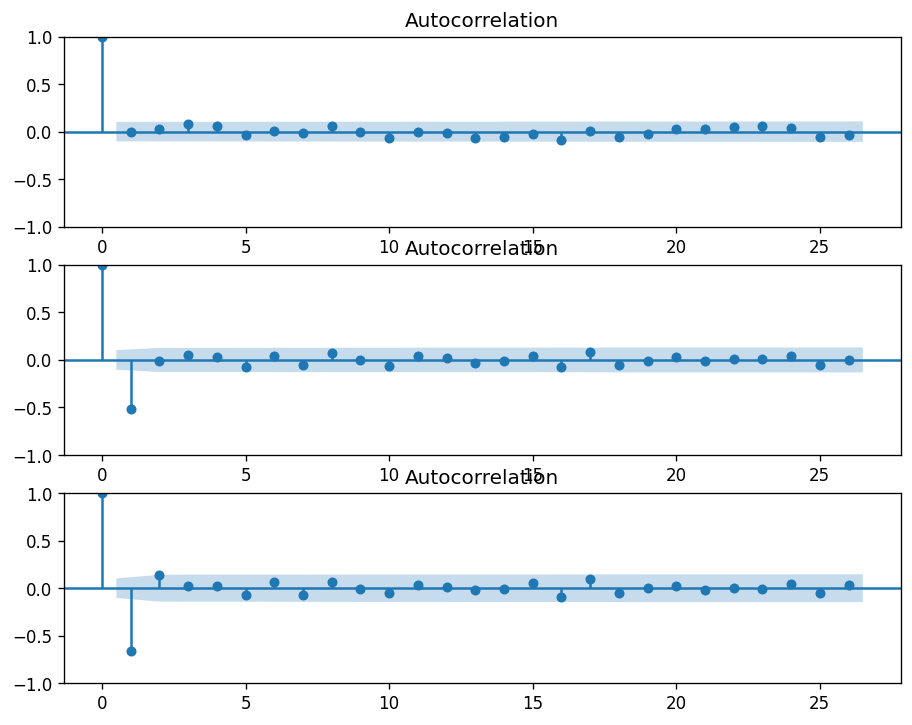

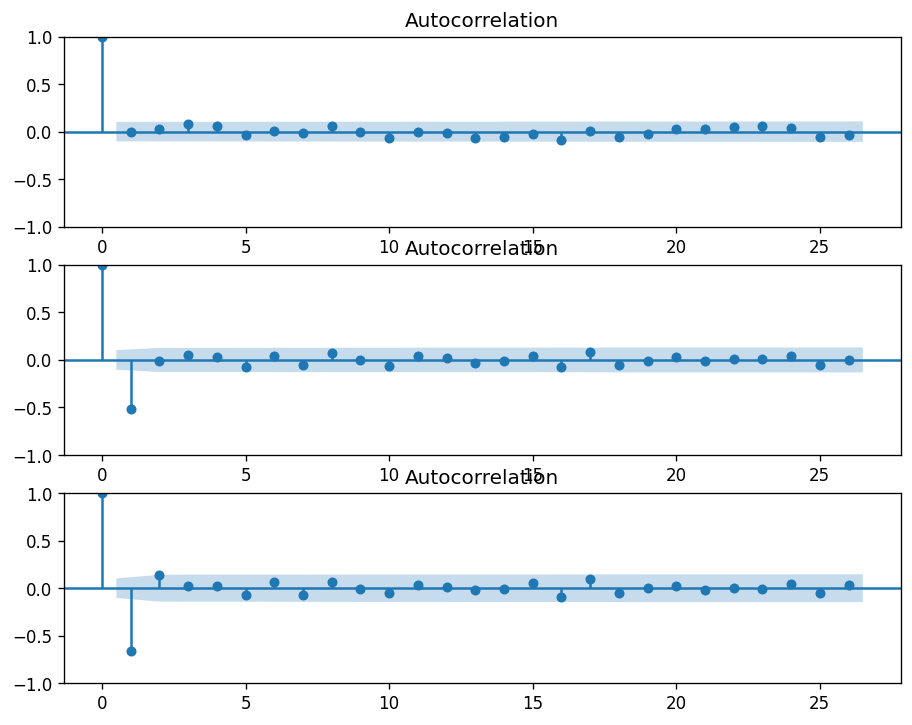

In [132]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df_regresi, ax=ax1)
plot_acf(df_regresi.diff().dropna(), ax=ax2)
plot_acf(df_regresi.diff().diff().dropna(), ax=ax3)

Dari kedua grafik diatas yaitu ordering dan autocorelation, nilai d yang didapatkan adalah 0 karena setelah dilakukan ordering pertama lag berpindah ke negatif. Hal ini terjadi karena data termasuk stasioner.

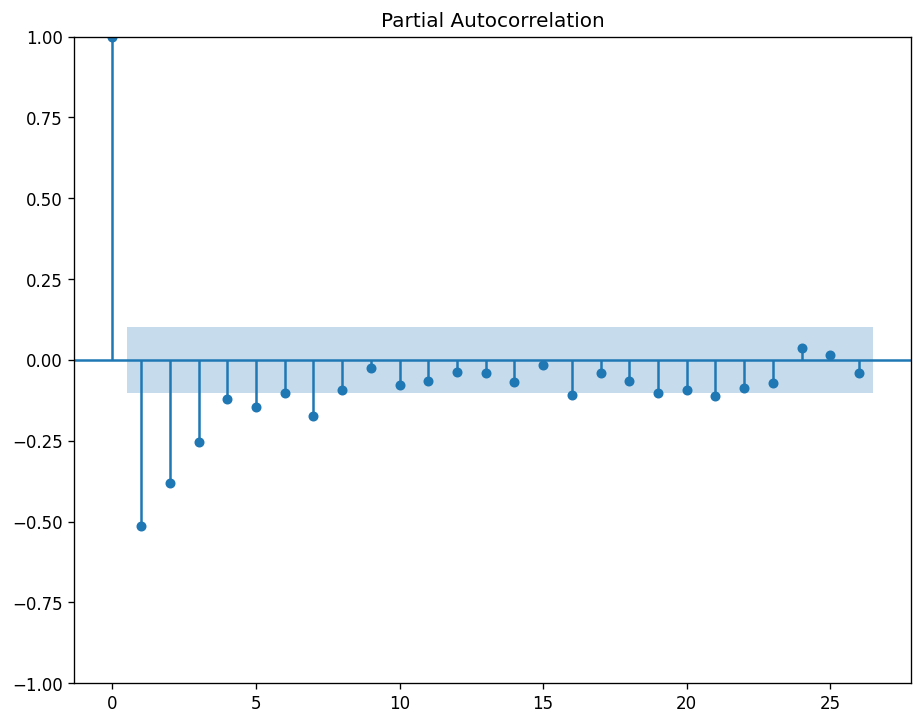

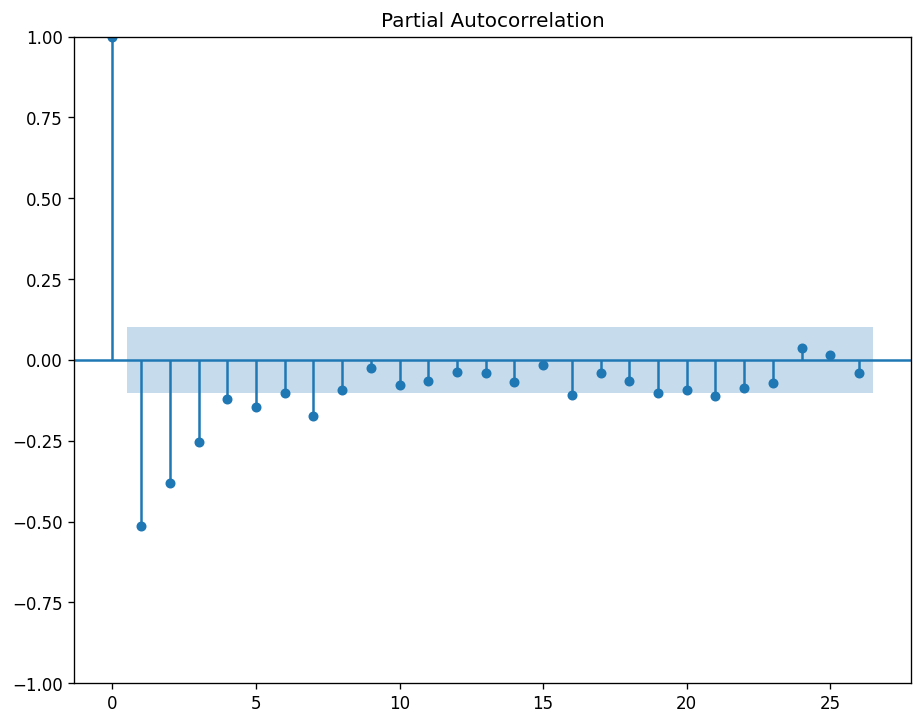

In [133]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_regresi.diff().dropna())

Dari grafik partial correlation diatas didapatkan nilai p yaitu 4. Hal ini dilihat dari lag pertama sampai ketiga yang berbeda jauh dari signifikan dan lag ke 4 yang hanya berbeda sedikit.

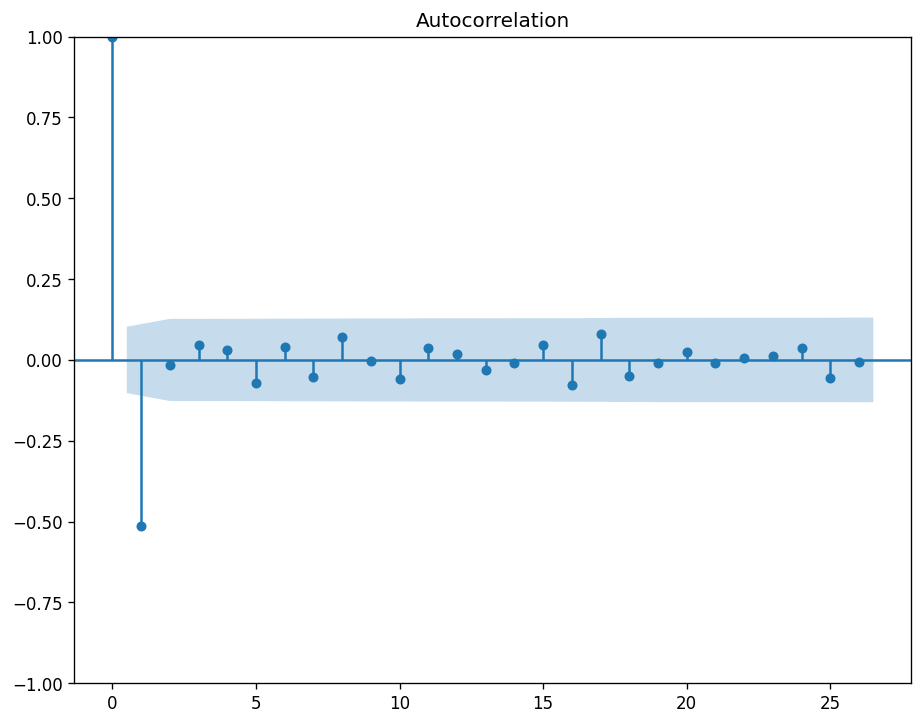

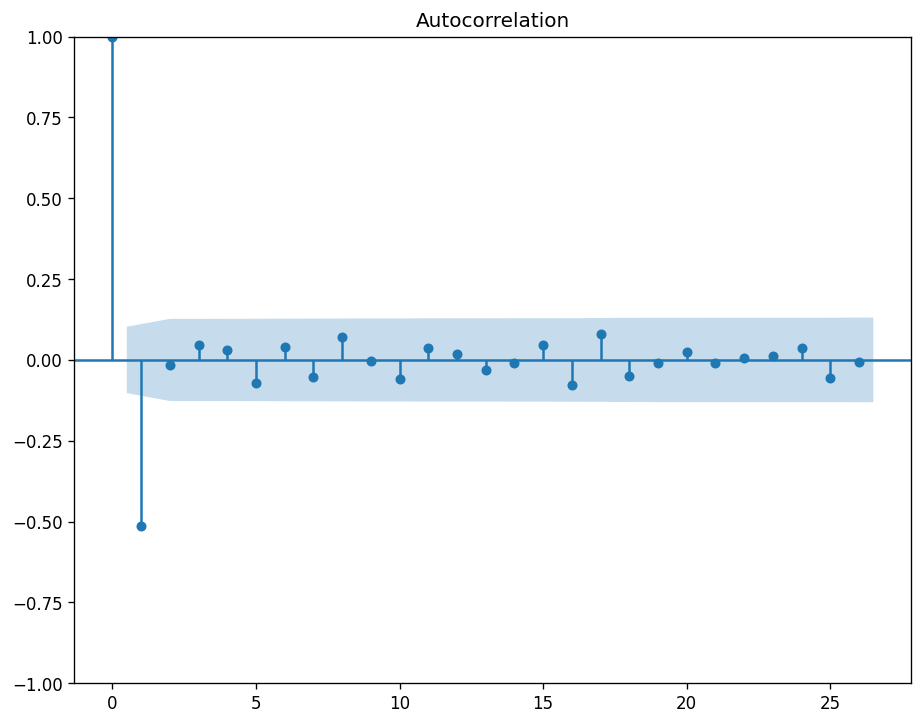

In [134]:
plot_acf(df_regresi.diff().dropna())

Disini bisa terlihat terdapat 2 flag yang sudah jauh dari jangkuan signfikan sehingga daidaptkan nilai q yaitu 2.

###Modeling

In [135]:
import statsmodels.api as sm
import sklearn.metrics as metrics

#####Menggunakan seluruh data

In [136]:
model = sm.tsa.arima.ARIMA(df_regresi, order=(4,0,2))
result = model.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  365
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1543.283
Date:                Thu, 28 Sep 2023   AIC                           3102.565
Time:                        13:37:47   BIC                           3133.764
Sample:                    01-01-2022   HQIC                          3114.964
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6581      1.104     44.992      0.000      47.495      51.821
ar.L1         -0.6299      0.558     -1.128      0.259      -1.724       0.465
ar.L2          0.0084      0.421      0.020      0.984      -0.817       0.834
ar.L3          0.1019      0.061      1.678      0.093      -0.017       0.221
ar.L4          0.1106      0.054      2.066      0.039       0.006       0.216
ma.L1          0.6221      0.560      1.111      0.267      -0.475       1.720
ma.L2          0.0117      0.418      0.028      0.978      -0.809       0.832
sigma2       275.4268     19.512     14.116      0.000     237.184     313.669
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                28.41
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.61
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

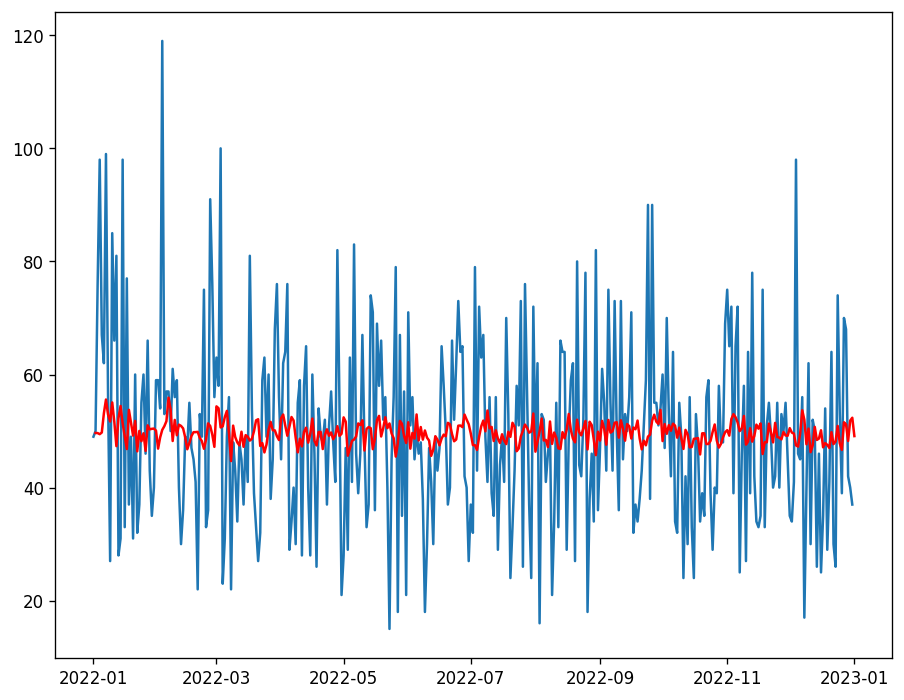

In [137]:
plt.plot(df_regresi)
plt.plot(result.predict(1, 365), color="red")
plt.show()

####Prediksi menggunakan data latih dan diuji dengan data uji

In [138]:
y=df_train['Qty']
ARIMAmod = sm.tsa.arima.ARIMA(y, order=(4,0,2))
ARIMAmod = ARIMAmod.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [178]:
y_pred = ARIMAmod.get_forecast(len(df_test))
df_y_pred = y_pred.conf_int()
df_y_pred['predict'] = ARIMAmod.predict(start=df_y_pred.index[0], end=df_y_pred.index[-1])
df_y_pred.index = df_test.index
y_pred_fin = df_y_pred['predict']
mae = metrics.mean_absolute_error(y_pred_fin, df_test['Qty'])
mse = metrics.mean_squared_error(y_pred_fin, df_test['Qty'])
rmse = np.sqrt(mse) # or mse**(0.5)
print("RMSE :", rmse)
print("MAE :", mae)

RMSE : 15.704400796635356
MAE : 13.04065336094165


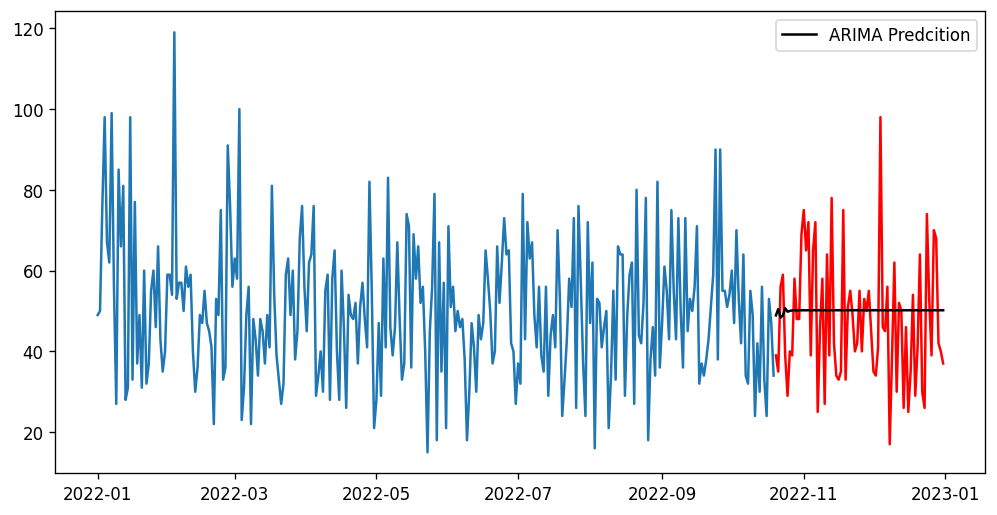

In [179]:
plt.figure(figsize=(10,5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_fin, color='black', label='ARIMA Predcition')
plt.legend()

hasil prediksi dari model ARIMA yang telah dibuat bisa dibilang masih belum cukup bagus karena nilai RMSE yang berniali 15 lebih dan MAE yang bernilai 12 lebih.

In [180]:
y_pred = ARIMAmod.get_forecast(len(df_test)+60)
df_y_pred = y_pred.conf_int()
df_y_pred['predict'] = ARIMAmod.predict(start=df_y_pred.index[0], end=df_y_pred.index[-1])
y_pred_fin = df_y_pred['predict']

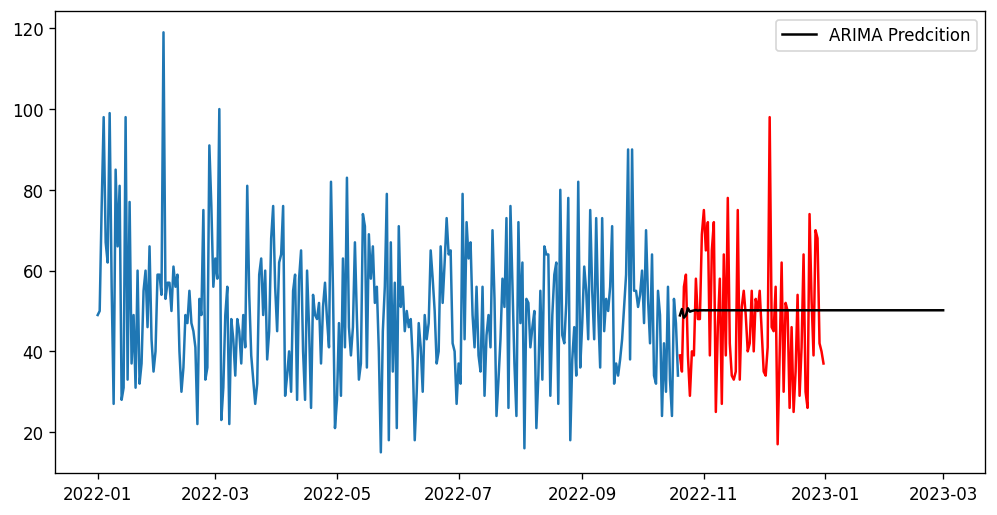

In [181]:
plt.figure(figsize=(10,5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_fin, color='black', label='ARIMA Predcition')
plt.legend()

Dan prediksi untuk jumlah quantity untuk dua bulan kedepan berdasarkan model ARIMA yang telah dibuat yaitu sekitar 50. Tentunya prediksi tersebut bisa dibilang belum cukup baik dan meyakinkan mengingat hasil pengujian yang belum memuaskan.

####Prediksi menggunakan Seasonal Arima

In [141]:
SARIMAmod = sm.tsa.statespace.SARIMAX(y, order=(4,0,2), seasonal_order=(1,1,1,12))
SARIMAmod = SARIMAmod.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [142]:
y_pred = SARIMAmod.get_forecast(len(df_test))
df_y_pred = y_pred.conf_int()
df_y_pred['predict'] = SARIMAmod.predict(start=df_y_pred.index[0], end=df_y_pred.index[-1])
df_y_pred.index = df_test.index
y_pred_fin = df_y_pred['predict']
mae = metrics.mean_absolute_error(y_pred_fin, df_test['Qty'])
mse = metrics.mean_squared_error(y_pred_fin, df_test['Qty'])
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_pred_fin, df_test['Qty'])
print("RMSE :", rmse)
print("MAE :", mae)
print("MSE :", mse)


RMSE : 15.750747719175216
MAE : 12.933196850289422
MSE : 248.08605371310324


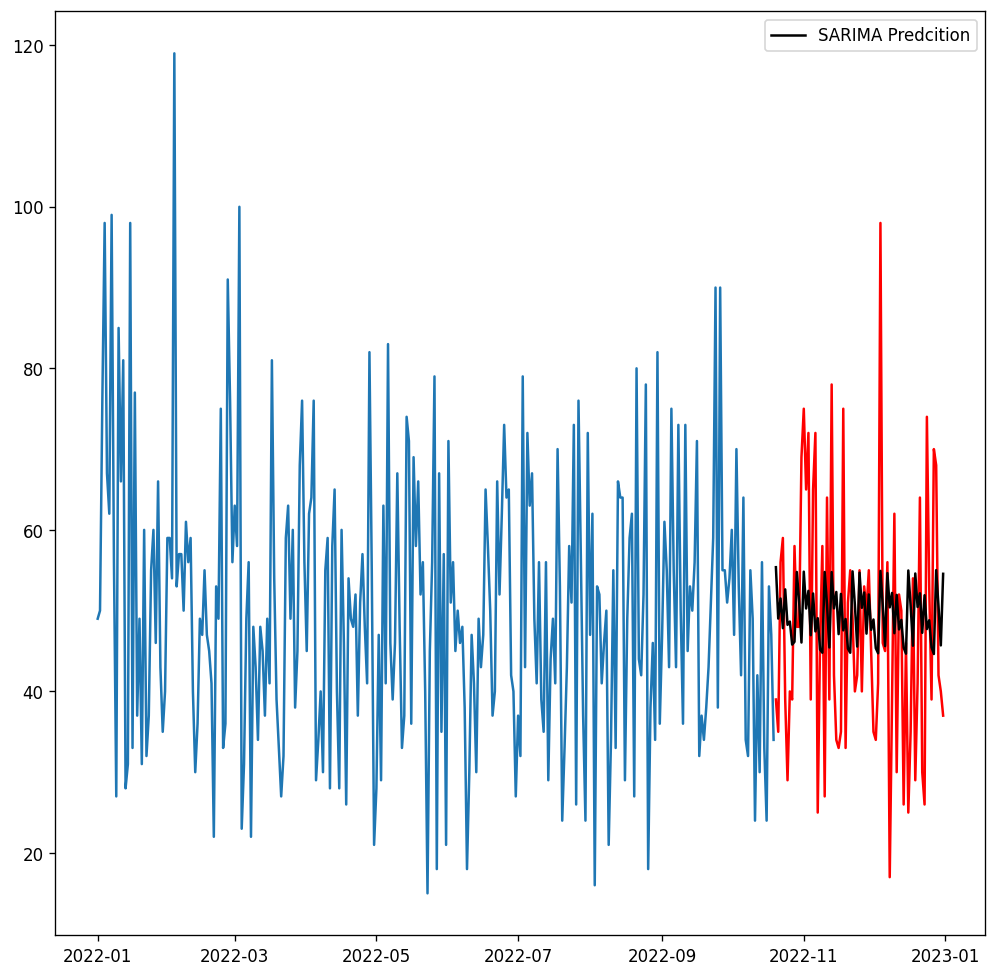

In [143]:
plt.figure(figsize=(10,10))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_fin, color='black', label='SARIMA Predcition')
plt.legend()

Penggunanan model seasonal ARIMA terlihat lebih baik diabandingkan model ARIMA meskpiun nilai RMSE dan MAE tidak terlihat begitu jauh.

In [176]:
y_pred = SARIMAmod.get_forecast(len(df_test)+60)
df_y_pred = y_pred.conf_int()
df_y_pred['predict'] = SARIMAmod.predict(start=df_y_pred.index[0], end=df_y_pred.index[-1])
y_pred_fin = df_y_pred['predict']

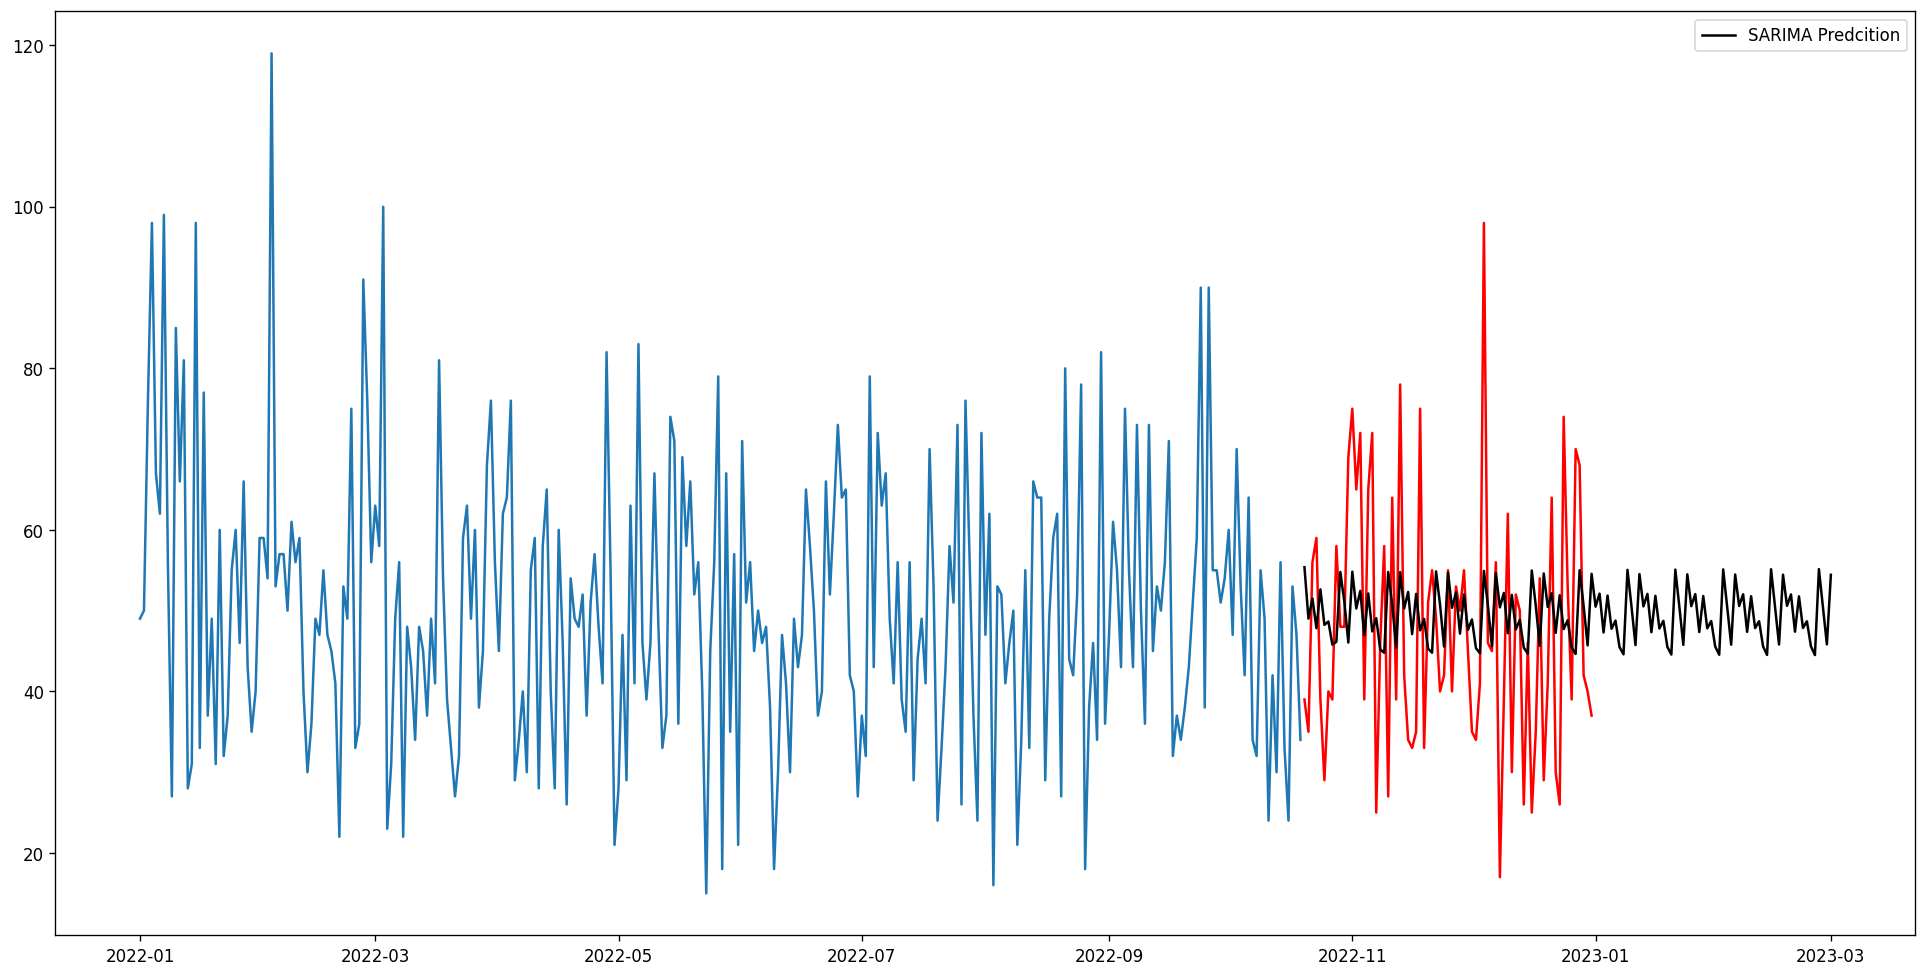

In [177]:
plt.figure(figsize=(20,10))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_fin, color='black', label='SARIMA Predcition')
plt.legend()

Hasil prediksi jumlah kauntitas atau jumlah barang untuk 2 bulan kedepan dengan menggunakan model seasonal ARIMA atau SARIMA adalah sekitar 50-55 barang. Tentunya prediksi yang dihasilkan dari model ini bisa dibilang lebih terpercaya dibanding model ARIMA sebelumnya dilihat dari hasil pengujian yang telah dilakukan walau peningkatannya tidak terlalu signifikan.

##Clustering dengab KMeans

###Preprocessing

In [144]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [145]:
df_cluster = df_merge.groupby(['CustomerID']).agg({'TransactionID':'count','Qty':'sum','TotalAmount':'sum'}).reset_index()
# df_cluster = df_cluster.set_index('CustomerID')
df_cluster.drop(columns='CustomerID', inplace=True)
df_cluster.rename(columns = {'TransactionID':'Count_Transaction','Qty':'Total_Quantity','TotalAMount':'Sum_TotalAmount'}, inplace = True)
df_cluster.head()

,Count_Transaction,Total_Quantity,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600


In [146]:
def print_rentang(df_input):
  list_fitur = df_input
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    print('Rentang fitur ',fitur,' adalah ',max-min)

In [147]:
def minmax (df_input):
  df_input = df_input.copy()
  list_fitur = df_input
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur]-min)/(max-min)
  return df_input

In [148]:
print_rentang(df_cluster)

Rentang fitur  Count_Transaction  adalah  18
Rentang fitur  Total_Quantity  adalah  69
Rentang fitur  TotalAmount  adalah  754600


In [149]:
df_cluster = minmax(df_cluster)
df_cluster.describe()

,Count_Transaction,Total_Quantity,TotalAmount
count,444.000000,444.000000,444.000000
mean,0.455956,0.446697,0.357197
std,0.180164,0.184405,0.165116
min,0.000000,0.000000,0.000000
25%,0.333333,0.318841,0.236649
50%,0.444444,0.434783,0.346011
75%,0.555556,0.579710,0.460708
max,1.000000,1.000000,1.000000


In [150]:
print_rentang(df_cluster)

Rentang fitur  Count_Transaction  adalah  1.0
Rentang fitur  Total_Quantity  adalah  1.0
Rentang fitur  TotalAmount  adalah  1.0


In [151]:
df_cluster.head()

,Count_Transaction,Total_Quantity,TotalAmount
0,0.777778,0.724638,0.703949
1,0.555556,0.681159,0.397827
2,0.666667,0.666667,0.469255
3,0.388889,0.521739,0.278823
4,0.222222,0.246377,0.233899


###Find Optimal k value with elbow method

In [152]:
from sklearn.cluster import KMeans

In [153]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

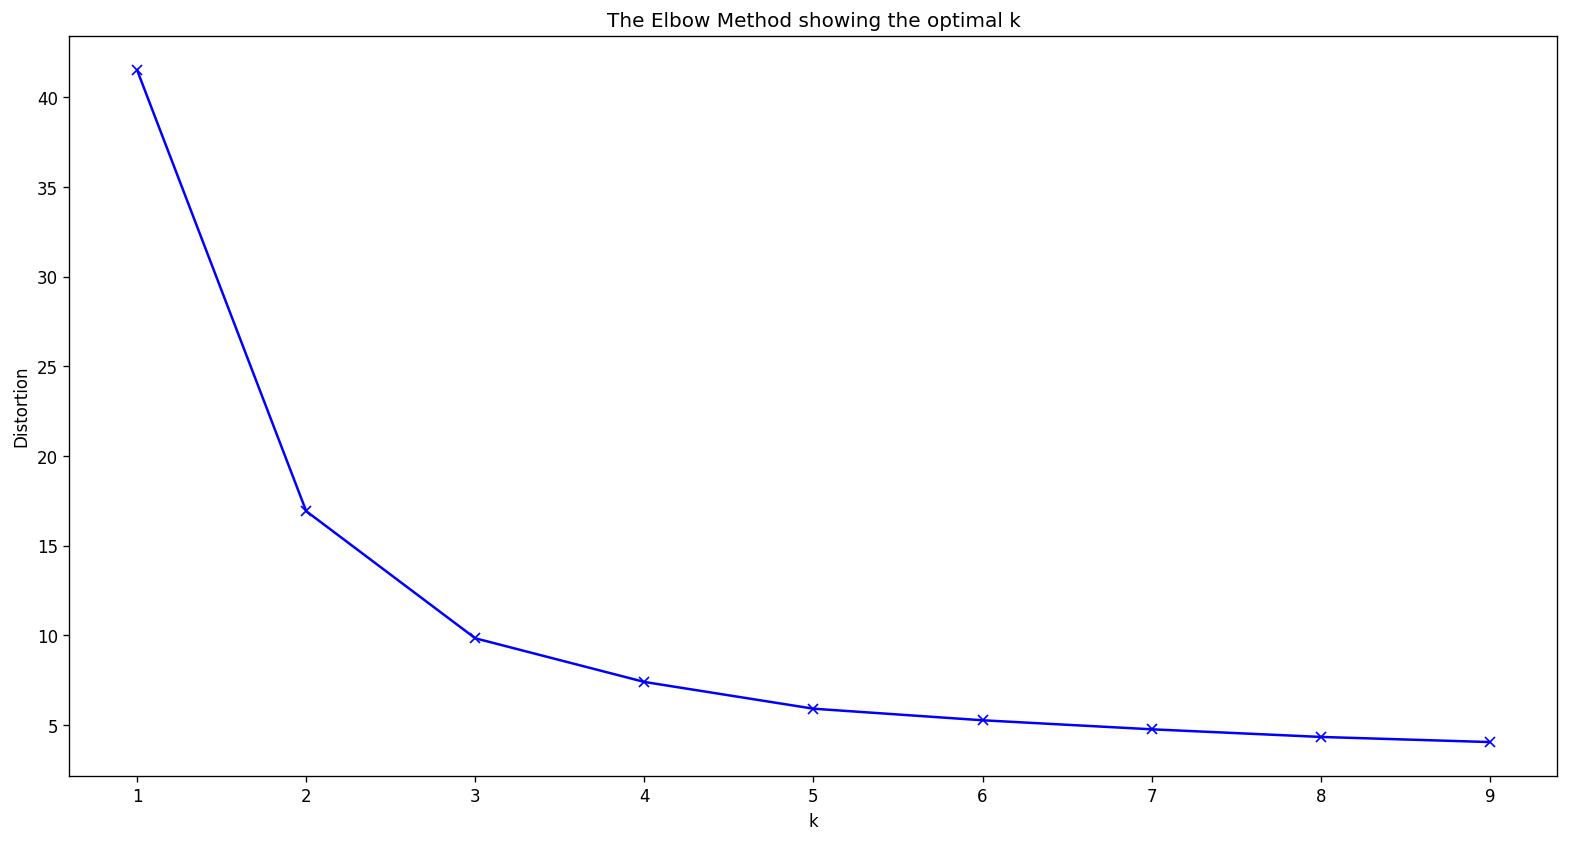

In [154]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Dari plot yang sudah kita buat, dapat dilihat pada nilai k=3, grafik mulai menjadi sangat landai sehingga k optimal adalah 3

###Modeling

In [155]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_cluster)
cluster = kmeanModel.predict(df_cluster)
df_cluster['Cluster'] = cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [156]:
df_cluster.head()

,Count_Transaction,Total_Quantity,TotalAmount,Cluster
0,0.777778,0.724638,0.703949,2
1,0.555556,0.681159,0.397827,2
2,0.666667,0.666667,0.469255,2
3,0.388889,0.521739,0.278823,0
4,0.222222,0.246377,0.233899,1


In [157]:
df_int = df_cluster.groupby(['Cluster']).agg({'Count_Transaction':'count','Total_Quantity':'sum','TotalAmount':'sum'}).reset_index()
df_int.head()

,Cluster,Count_Transaction,Total_Quantity,TotalAmount
0,0,205,92.115942,73.026372
1,1,131,31.753623,23.688047
2,2,108,74.463768,61.881262


dapat kita lihat dari hasil clustering yang sudah dilakukan terdapat 3 cluster yang telah terbentuk.

cluster-cluster tersebut dapat kita bedakan dengan mengamati pada kluster pertama merupakan cluster yang sering melakukan transaksi dan menghasilkan keuntungan yang paling besar. cluster selanjutnya merupakan cluster yang sering melakukan transaksi namun tidak sesering cluster pertama dan keuntungan yang didapatkan juga paling sedikit dikarenakan barang yang dibeli juga tidak terlalu banyak dilihat dari total quantitas. cluster yang terakhir merupakan cluster dengan jumlah transaksi paling sedikit namun menghasilkan keuntungan yang lebih besar daripada cluster kedua dan jumlah barang yang dibeli juga lebih banyak dibandingkan cluster kedua.

Untuk itu, hal yang dapat kita lakukan adalah dengan mempromosikan produk yang lebih menghasilkan profit pada cluster pertama dengan memberikan promo-promo yang bergandengan seperti memberikan promo pada pembelian produk yang sering dibeli dengan produk yang menghasilkan profit paling banyak.

Untuk cluster 2 kita bisa memberikan promo seperti 2 gratis 1 mengingat cluster ini sering melakukan pembelian namun jumlah barang yang dibeli tidak terlalu banyak

Untuk cluster 3, dapat dilihat mereka tidak terlalu sering melakukan transaksi namun jumlah barang yang dibeli cukup banyak sehingga menghasilkan keuntungan yang cukup banyak juga. Untuk itu kita bisa menawarkan prodk-produk baru serta meberikan diskon yang terus berubah-ubah dalam jangka waktu tertentu sehingga mereka lebih sering membeli untuk mengincar diskon-diskon yang berbeada-beda